# Pre-process and load the dateset

In [2]:
import re 
import pandas as pd
import numpy as np 
# from BetaPose import utils


def loaddb(dbfile):
  with open(dbfile, "r") as file1: 
    lines = [i.strip() for i in file1.read().split("\n")]
    lines = [i for i in lines if len(i)>0 and i[0]!="#"]
    lines = [re.sub(r"//.*", "", i).strip() for i in lines]
    table = [i.split() for i in lines]
  table = pd.DataFrame(table, columns = ["PDB","resolution","year","affinity","kd/ki"]);
  table['year'] = table['year'].astype(int)
  table['resolution'] = table['resolution'].astype(float)
  table['affinity'] = table['affinity'].astype(float)
  return table

  
# Pre-process the PDBBind-refined dataset (CSV)
PB_setfile = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/INDEX_refined_data.2020"
table = loaddb(PB_setfile)
a = list(table.PDB)
print(f"All Entries: {len(a)} ; Unique Entries: {len(set(a))}")

All Entries: 5316 ; Unique Entries: 5316


(array([185., 432., 745., 860., 983., 951., 642., 312., 140.,  66.]),
 array([ 2.   ,  2.992,  3.984,  4.976,  5.968,  6.96 ,  7.952,  8.944,
         9.936, 10.928, 11.92 ]),
 <BarContainer object of 10 artists>)

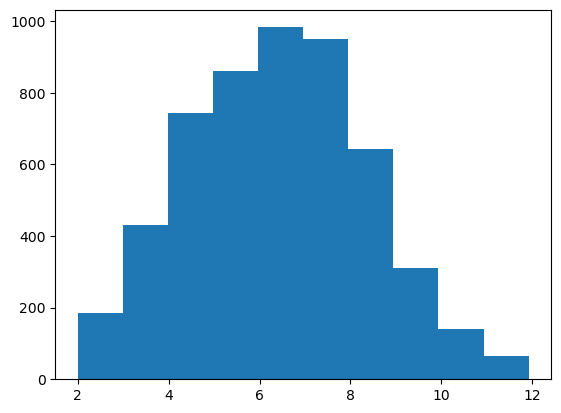

In [7]:
import matplotlib.pyplot as plt
# plt.hist(table.year.astype(int), bins=10)
plt.hist(table.affinity.astype(float), bins=10)

# Only keep the selected entries

In [6]:
# Reference: 
# Marchand, Jean-Rémy, et al. "An ABSINTH-Based Protocol for Predicting Binding Affinities between Proteins and Small Molecules." Journal of Chemical Information and Modeling 60.10 (2020): 5188-5202.
# 754 entries

abs_sel = ['1a4k','1a4w','1a69','1a8i','1a99','1aaq','1adl','1ai4','1ai5','1ai7','1aid','1ajn','1ajp','1ajq','1ajv','1ajx','1apw','1ax0','1axz','1b05','1b0h','1b1h','1b40','1b46','1b6h','1b6k','1b7h','1b9j','1bcu','1bdq','1bgq','1bhx','1bju','1bjv','1bq4','1br6','1bv7','1bv9','1bwa','1c3x','1c5n','1c5o','1c5p','1c5q','1c5s','1c5t','1c5x','1c5y','1c5z','1c70','1c83','1c84','1c86','1c87','1c88','1ce5','1cea','1ceb','1d4h','1d4i','1d4k','1d4l','1d6v','1d7i','1d7j','1db1','1df8','1dfo','1dhi','1dhj','1dmp','1drk','1dzk','1e1v','1e1x','1e2k','1e2l','1e3v','1e6s','1eb2','1ebw','1eby','1ebz','1ec0','1ec1','1ecv','1efy','1ejn','1ela','1eld','1ele','1enu','1epo','1erb','1ezq','1f0r','1f0u','1f4e','1f4g','1f4x','1fcx','1fcy','1fcz','1fd0','1fh7','1fh8','1fh9','1fhd','1fj4','1fkg','1fkh','1fki','1fl3','1fpc','1g2k','1g2l','1g30','1g32','1g35','1g36','1g74','1g7g','1g85','1gcz','1ghv','1ghw','1ghz','1gi1','1gi7','1gj6','1gja','1gni','1gpn','1gu1','1gyx','1gyy','1gzc','1h1p','1h1s','1h22','1h23','1h9z','1ha2','1hbv','1hmr','1hms','1hmt','1hps','1hpv','1hpx','1hsh','1hvh','1hvi','1hvj','1hvk','1hvl','1hvr','1hvs','1hwr','1hxb','1hxw','1i00','1i5r','1igj','1ii5','1izh','1izi','1j14','1j16','1j17','1j4r','1jak','1jet','1jgl','1jqy','1jsv','1jwt','1jys','1jzs','1k1i','1k1j','1k1l','1k1m','1k1n','1k21','1k22','1k4g','1k4h','1kdk','1kv1','1kyv','1kzk','1kzn','1l2s','1l83','1laf','1lag','1lah','1lbk','1lee','1lf2','1lgw','1li2','1li3','1li6','1lke','1lnm','1lpg','1lpk','1lpz','1lst','1m2q','1m2r','1m48','1mes','1met','1mfi','1mq5','1mq6','1mrw','1mrx','1msm','1msn','1mtr','1mu6','1mu8','1n1m','1n1t','1n2v','1n46','1n4h','1n7m','1n8v','1nc1','1nc3','1nf8','1nfu','1nfw','1nfy','1nhu','1nl9','1nli','1nny','1no6','1nq7','1nt1','1nvq','1nvr','1nvs','1nw7','1nz7','1o2o','1o2q','1o2s','1o2w','1o2x','1o2z','1o30','1o33','1o36','1o3d','1o3i','1o3j','1o3k','1o3p','1o5a','1o5b','1o5c','1o5e','1o5g','1oba','1ocq','1od8','1odi','1odj','1ogd','1ogz','1ohr','1ony','1onz','1os5','1oss','1owe','1owh','1oyq','1oyt','1p1n','1p1o','1p1q','1p57','1pb8','1pb9','1pbq','1pot','1ppc','1pph','1pr1','1pxn','1pxp','1pzi','1q63','1q65','1q66','1q72','1q8t','1qan','1qaw','1qb1','1qbn','1qbo','1qbr','1qbs','1qbu','1qbv','1qi0','1qiw','1qy1','1qy2','1r0p','1r4w','1r5y','1r6n','1r9l','1rd4','1rpj','1s38','1sbg','1sdt','1sdu','1sdv','1sgu','1sh9','1siv','1sqo','1sr7','1srg','1ssq','1stc','1sv3','1sw2','1swg','1swr','1syh','1syi','1t4v','1t7j','1ta2','1ta6','1tcw','1tcx','1td7','1tng','1tnh','1tni','1tog','1toi','1toj','1tok','1tom','1u1w','1ugw','1ugx','1uou','1upf','1urg','1usi','1usk','1utj','1utl','1utm','1utn','1uv6','1uvt','1uw6','1uwf','1uz4','1v0k','1v0l','1v1j','1v2j','1v2k','1v2l','1v2n','1v2o','1v2q','1v2r','1v2s','1v2t','1v2u','1v2w','1vfn','1vj9','1vja','1vyf','1vyg','1vyq','1vzq','1w0z','1w11','1w13','1w3j','1w3k','1w5v','1w5w','1w5x','1w5y','1wcq','1wdn','1we2','1wht','1wm1','1ws4','1ws5','1x8j','1x9d','1xap','1xff','1xgi','1xgj','1xhy','1xk9','1xka','1xkk','1xow','1xt8','1y1z','1y20','1y3n','1y6q','1y6r','1yc1','1yc4','1ydk','1ydr','1yds','1ydt','1yqj','1z1r','1z6e','1zgi','1zhy','1zoe','1zog','1zp8','220l','2a4m','2a8g','2aac','2aj8','2aqu','2avo','2avs','2avv','2ayr','2azr','2b07','2b1v','2b4l','2bak','2bal','2boh','2bok','2bpv','2bpy','2bq7','2bqv','2br1','2brb','2brm','2bt9','2bvd','2bvr','2bvs','2byr','2bys','2bz6','2bza','2c1p','2c3l','2cbu','2cej','2cen','2cgf','2cht','2cji','2csn','2d0k','2d3u','2d3z','2drc','2dri','2e2r','2e7f','2epn','2exm','2f1g','2f2h','2f34','2f35','2f5t','2f80','2f81','2f8g','2fgu','2fgv','2flr','2fpz','2fqw','2fqx','2fr3','2fw6','2fwp','2fx6','2fxu','2g79','2g8r','2g94','2gl0','2glp','2gss','2gst','2gv6','2gv7','2h4g','2h4k','2h6b','2ha2','2ha3','2ha5','2ha6','2hb1','2hb3','2hhn','2hjb','2hs1','2hs2','2hxm','2i0a','2i2b','2i4j','2i4u','2i4v','2i80','2idw','2ien','2ieo','2ihq','2iko','2il2','2iuz','2iwx','2izl','2j2u','2j34','2j47','2j4g','2j4i','2j77','2j7e','2j7g','2j7h','2j9n','2jds','2jfz','2jh0','2jh5','2jh6','2jiw','2nmy','2nmz','2nnk','2nnp','2nt7','2nta','2o0u','2o2u','2o4j','2o4k','2o4r','2o4s','2oag','2ogy','2ojg','2ojj','2ok1','2on6','2oxd','2oxx','2oxy','2oyk','2oym','2p16','2p4j','2p4y','2p7a','2p7z','2p95','2pcp','2pgz','2pk5','2pk6','2pql','2pqz','2psu','2psv','2pu2','2pvh','2pvj','2pvk','2pvl','2pwc','2pwd','2pwg','2pwr','2pyn','2q54','2q55','2q5k','2q63','2q64','2q88','2q89','2qbq','2qbr','2qbs','2qbu','2qci','2qd6','2qd7','2qd8','2qe4','2qfo','2qg0','2qg2','2qhm','2qhy','2qhz','2qi0','2qi1','2qi3','2qi4','2qi5','2qi6','2qi7','2qm9','2qmg','2qnn','2qnq','2qrl','2qt5','2qtg','2qu6','2r2m','2r2w','2r38','2r3t','2r3w','2r43','2r5a','2r5p','2r6w','2r6y','2ra0','2rcb','2ri9','2rkf','2rkg','2sim','2std','2tpi','2uwo','2uxz','2uy0','2v00','2v3u','2v95','2vh6','2vkm','2vnt','2vw5','2vyt','2z4b','2zb0','2zb1','3aid','3b4p','3b50','3b5r','3b65','3b66','3b67','3b68','3b7j','3be9','3bex','3bfu','3bgb','3bgc','3bgq','3bgz','3bra','3brn','3bu1','3buf','3bug','3buh','3bvb','3c2u','3cct','3ccw','3ccz','3cd0','3cd5','3cd7','3cda','3cdb','3cf8','3cj2','3cj4','3cj5','3ckp','3cs7','3cyw','3cyx','3d0b','3d1x','3d1y','3d1z','3d20','3d7z','3d83','3d94','3djk','3e5a','3e5u','3e64','3e92','3e93','3ebl','3eko','3ekr','3eqr','3f8c','3f8f','3gss','3gst','3jdw','3kiv','4ts1','5er1','5std','5yas','6std','7std']
abs_sel = [i.upper() for i in abs_sel]; 
abs_sel = list(set(abs_sel)); 
print(f"ABSINTH Entries: {len(abs_sel)} ; ABSINTH Unique: {len(set(abs_sel))}"); 

table_abs = pd.DataFrame(columns = ["PDB","resolution","year","affinity","kd/ki"])
for i in abs_sel:
  theline = table.loc[table.PDB == i.lower()]
  if len(theline) > 0:
    table_abs = pd.concat([table_abs,theline],ignore_index=True)

table_abs = table_abs.reset_index()
table_abs = table_abs.set_index("index")
table_abs
# print(len(table_abs))

ABSINTH Entries: 754 ; ABSINTH Unique: 754
668


# Calculate the Ligand Embeding Factor/Heavy Atom Number

In [8]:
import re 
import pandas as pd 
import numpy as np 
from BetaPose import utils

basepath = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/"

emb_factor = []; 
c_nha = []; 
l_nha = []; 
for idx,row in table_abs.iterrows():
#   if idx == 5:
#     break
  pdbcode = row.PDB; 
  embfactor = utils.EmbeddingFactor(basepath, pdbcode)
  complex_nha = utils.PRO_nha(f"{basepath}/{pdbcode}/{pdbcode}_complex.pdb"); 
  lig_nha = utils.LIG_nha(f"{basepath}/{pdbcode}/{pdbcode}_complex.pdb")
  emb_factor.append(embfactor)
  c_nha.append(complex_nha); 
  l_nha.append(lig_nha);
#   print(pdbcode, embfactor, complex_nha, lig_nha)
if len(emb_factor) == len(c_nha) and len(emb_factor) == len(l_nha) and len(emb_factor) == len(table_abs):
  print("Success")
  table_abs["embedding_factor"] = emb_factor; 
  table_abs["complex_nha"] = c_nha; 
  table_abs["lig_nha"] = l_nha; 
else: 
  print(f"Failed to match entry length {len(table_abs)} {len(emb_factor)} {len(c_nha)} {len(l_nha)}")


Surface contribution: 50.3763; Surface pure: 678.541
Surface contribution: 248.8757; Surface pure: 630.763
Surface contribution: 33.1718; Surface pure: 359.648
Surface contribution: 234.8653; Surface pure: 693.081
Surface contribution: 93.8005; Surface pure: 784.74
Surface contribution: 4.1203; Surface pure: 727.186
Surface contribution: 164.2154; Surface pure: 472.261
Surface contribution: 121.1886; Surface pure: 588.103
Surface contribution: 82.0514; Surface pure: 341.927
Surface contribution: 188.401; Surface pure: 864.358
Surface contribution: 105.2899; Surface pure: 431.047
Surface contribution: 117.4672; Surface pure: 679.113
Surface contribution: 54.9268; Surface pure: 381.786
Surface contribution: 210.0604; Surface pure: 785.924
Surface contribution: 62.4585; Surface pure: 623.89
Surface contribution: 56.8772; Surface pure: 304.011
Surface contribution: 60.7131; Surface pure: 363.42
Surface contribution: 106.9282; Surface pure: 554.21
Surface contribution: 88.8106; Surface pure

Surface contribution: 80.0326; Surface pure: 487.344
Surface contribution: 1.3913; Surface pure: 269.769
Surface contribution: 104.0153; Surface pure: 736.341
Surface contribution: 145.8319; Surface pure: 546.273
Surface contribution: -16.4365; Surface pure: 334.442
Surface contribution: 122.4085; Surface pure: 739.796
Surface contribution: 50.6867; Surface pure: 356.628
Surface contribution: 37.2155; Surface pure: 317.766
Surface contribution: 50.689; Surface pure: 699.391
Surface contribution: 71.3438; Surface pure: 596.746
Surface contribution: 77.0071; Surface pure: 454.129
Surface contribution: 104.6998; Surface pure: 568.119
Surface contribution: -17.4566; Surface pure: 383.12
Surface contribution: 222.929; Surface pure: 677.395
Surface contribution: 166.1333; Surface pure: 713.102
Surface contribution: 156.9654; Surface pure: 606.579
Surface contribution: 114.7165; Surface pure: 768.367
Surface contribution: 95.6411; Surface pure: 562.043
Surface contribution: 4.3348; Surface pu

Surface contribution: 13.1647; Surface pure: 239.635
Surface contribution: 21.8868; Surface pure: 720.039
Surface contribution: 16.4747; Surface pure: 245.012
Surface contribution: 109.9758; Surface pure: 551.313
Surface contribution: 55.7842; Surface pure: 244.194
Surface contribution: 133.9147; Surface pure: 484.594
Surface contribution: -15.0098; Surface pure: 489.676
Surface contribution: 98.8066; Surface pure: 412.536
Surface contribution: 196.7537; Surface pure: 550.803
Surface contribution: -6.1312; Surface pure: 252.336
Surface contribution: 115.2262; Surface pure: 556.863
Surface contribution: 36.9789; Surface pure: 694.014
Surface contribution: 74.237; Surface pure: 343.37
Surface contribution: 209.4591; Surface pure: 619.008
Surface contribution: 152.6783; Surface pure: 533.71
Surface contribution: 48.8811; Surface pure: 414.608
Surface contribution: 84.3607; Surface pure: 395.647
Surface contribution: 36.129; Surface pure: 655.447
Surface contribution: -14.486; Surface pure

[11:14:07] 1bq4_ligand: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.


Surface contribution: 154.4393; Surface pure: 479.156
Surface contribution: 46.0124; Surface pure: 317.641
Surface contribution: 73.1259; Surface pure: 341.516
Surface contribution: 94.3683; Surface pure: 767.463
Surface contribution: 120.4235; Surface pure: 530.097
Surface contribution: -24.2757; Surface pure: 287.49
Surface contribution: 60.3274; Surface pure: 453.75
Surface contribution: 87.3795; Surface pure: 508.896
Surface contribution: 215.5375; Surface pure: 658.73
Surface contribution: 19.4091; Surface pure: 199.36
Surface contribution: 172.9318; Surface pure: 867.107
Surface contribution: 70.2132; Surface pure: 685.519
Surface contribution: 27.7032; Surface pure: 287.577
Surface contribution: 44.7807; Surface pure: 332.99
Surface contribution: -9.1452; Surface pure: 370.347
Surface contribution: 66.5051; Surface pure: 423.433
Surface contribution: 45.9091; Surface pure: 378.68
Surface contribution: 145.8407; Surface pure: 595.887
Surface contribution: 235.5972; Surface pure: 

Surface contribution: 55.6215; Surface pure: 535.365
Surface contribution: 107.3101; Surface pure: 267.783
Surface contribution: 6.7208; Surface pure: 269.977
Surface contribution: 132.7871; Surface pure: 758.522
Surface contribution: -21.8361; Surface pure: 361.837
Surface contribution: 102.4852; Surface pure: 294.172
Surface contribution: 158.5743; Surface pure: 612.123
Surface contribution: -22.0312; Surface pure: 316.24
Surface contribution: 5.9701; Surface pure: 257.146
Surface contribution: 116.6622; Surface pure: 898.699
Surface contribution: 127.6573; Surface pure: 361.868
Surface contribution: 49.9735; Surface pure: 340.408
Surface contribution: 15.3241; Surface pure: 345.072
Surface contribution: -4.2448; Surface pure: 277.633
Surface contribution: 90.1625; Surface pure: 376.145
Surface contribution: 12.4396; Surface pure: 343.792
Surface contribution: -2.7483; Surface pure: 234.267
Surface contribution: 149.536; Surface pure: 767.522
Surface contribution: 86.7845; Surface pu

Surface contribution: 95.321; Surface pure: 576.8
Surface contribution: 55.8609; Surface pure: 541.557
Surface contribution: 13.4405; Surface pure: 473.412
Surface contribution: 29.2009; Surface pure: 272.16
Surface contribution: 115.0165; Surface pure: 723.414
Surface contribution: 40.7516; Surface pure: 240.601
Surface contribution: -18.8736; Surface pure: 302.796
Surface contribution: 45.8023; Surface pure: 629.346
Surface contribution: 123.4818; Surface pure: 610.484
Surface contribution: 308.2015; Surface pure: 601.895
Surface contribution: 63.8361; Surface pure: 371.181
Surface contribution: 152.5312; Surface pure: 516.009
Surface contribution: 187.4288; Surface pure: 814.915
Surface contribution: 135.1414; Surface pure: 591.578
Surface contribution: 44.0324; Surface pure: 313.727
Success


In [15]:
ABSSEL_setfile = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/INDEX_ABS_SEL.csv"
with open(ABSSEL_setfile, 'w') as file1: 
  file1.write(table_abs.to_csv())
table_abs
# table_abs["embedding_factor"].std()

,PDB,resolution,year,affinity,kd/ki,embedding_factor,complex_nha,lig_nha
index,,,,,,,,
0,1bdq,2.5,1998,6.34,Ki=0.46uM,0.925758,1584,39
1,1k1i,2.2,2001,6.58,Kd=264nM,0.605437,1811,36
2,2azr,2.0,2005,3.64,Ki=230uM,0.907766,2658,17
3,1j4r,1.8,2001,7.72,Ki=0.019uM,0.661129,927,45
4,2fgv,1.5,2006,6.12,Kd=760nM,0.880469,1736,49
...,...,...,...,...,...,...,...,...
663,1c88,1.8,2000,5.29,Ki=5.1uM,0.828019,2669,18
664,1ele,2.0,1995,6.85,Ki=0.14uM,0.704402,1989,29
665,3cdb,2.3,2008,7.02,Kd=95.7nM,0.770002,12962,46


In [22]:
import matplotlib.pyplot as plt 

print(f"Embedding Factor: Mean: {table_abs.embedding_factor.mean()} ; Std: {table_abs.embedding_factor.std()} ; Threshold {round(table_abs.embedding_factor.mean() - table_abs.embedding_factor.std())}")
print(f"Ligand NHA: Mean: {table_abs.lig_nha.mean()} ; Std: {table_abs.lig_nha.std()} ; Threshold {round(table_abs.lig_nha.mean() - table_abs.lig_nha.std())}")
print(f"Complex NHA: Mean: {table_abs.complex_nha.mean()} ; Std: {table_abs.complex_nha.std()} ; Threshold {round(table_abs.complex_nha.mean() + table_abs.complex_nha.std())}")

threshold = 0.6
print(f"Embedding Factor greater than {threshold}: {np.count_nonzero(table_abs.embedding_factor > threshold)}/{len(table_abs)}")
threshold = 0.7
print(f"Embedding Factor greater than {threshold}: {np.count_nonzero(table_abs.embedding_factor > threshold)}/{len(table_abs)}")
threshold = 0.8
print(f"Embedding Factor greater than {threshold}: {np.count_nonzero(table_abs.embedding_factor > threshold)}/{len(table_abs)}")
# nha_threshold = 6035


Embedding Factor: Mean: 0.8608302043935462 ; Std: 0.13592162138455888 ; Threshold 1
Ligand NHA: Mean: 27.40868263473054 ; Std: 12.682457257961795 ; Threshold 15
Complex NHA: Mean: 3227.7080838323354 ; Std: 2807.1385448013903 ; Threshold 6035
Embedding Factor greater than 0.6: 651/668
Embedding Factor greater than 0.7: 588/668
Embedding Factor greater than 0.8: 458/668


# Calculate the heavy/hydrogen atom number ratio

In [24]:
ratios=[];
for i,row in table_abs.iterrows():
  pdbcode= row.PDB.lower();
  pdbfile = f"/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/{pdbcode}/{pdbcode}_complex.pdb";
  nha = utils.PRO_nha(pdbfile); 
  nh  = utils.PRO_nhydrogen(pdbfile); 
  ratios.append(nha/nh); 
#   print(f"{nha}, {nh}, ratio: {nha/nh}")
print(np.mean(ratios)) 
# Average ration of nha and hydrogen number: 1.109888041096362


1.109888041096362


# Put the titles and the sequences to the table

In [28]:
import re
import requests

from BetaPose import utils
from Bio.SeqUtils import seq1

titles = [];
seqs = []; 
for idx, row in table_abs.iterrows():
  pdb = row.PDB.lower()
  pdbstr = utils.fetch(pdb)
  title = " ".join([i.strip("TITLE").strip() for i in pdbstr.split("\n") if "TITLE" in i])
  titles.append(title)  
  
  chainids = [i[11] for i in pdbstr.split("\n") if re.search(r"SEQRES.*[A-Z].*[0-9]", i)];
  chainid = chainids[0];
  title = " ".join([i[19:] for i in pdbstr.split("\n") if re.search(f"SEQRES.*{chainid}.*[0-9]", i)]); 
  seqstr = "".join(title.split());
  seqstr = seq1(seqstr); 
  if len(seqstr) > 4:
    # print(f"{idx} : {seqstr}")
    seqs.append(seqstr)
  else: 
    print("Not found a proper single chain")
    title = " ".join([i[19:] for i in pdbstr.split("\n") if re.search(r"SEQRES", i)])
    seqstr = "".join(title.split());
    seqstr = seq1(seqstr); 
    seqs.append(seqstr)


if len(titles) == len(table_abs):
  print(f"Finished the title retrieval")
  table_abs["title"] = titles; 
if len(seqs) == len(table_abs):
  print(f"Finished the sequence retrieval")
  table_abs["seq"] = seqs; 
table_abs

Finished the title retrieval: 1n1m
Finished the sequence retrieval: 1n1m


,PDB,resolution,year,affinity,kd/ki,embedding_factor,complex_nha,lig_nha,title,seq
index,,,,,,,,,,
0,1bdq,2.5,1998,6.34,Ki=0.46uM,0.925758,1584,39,"HIV-1 (2:31-37, 47, 82) PROTEASE COMPLEXED WIT...",PQITLWQRPLVTIKIGGQLKEALLDTGADDSIVAGIELPGRWKPKM...
1,1k1i,2.2,2001,6.58,Kd=264nM,0.605437,1811,36,BOVINE TRYPSIN-INHIBITOR COMPLEX,IVGGYTCGANTVPYQVSLNSGYHFCGGSLINSQWVVSAAHCYKSGI...
2,2azr,2.0,2005,3.64,Ki=230uM,0.907766,2658,17,CRYSTAL STRUCTURE OF PTP1B WITH BICYCLIC THIOP...,MEMEKEFEQIDKSGSWAAIYQDIRHEASDFPCRVAKLPKNKNRNRY...
3,1j4r,1.8,2001,7.72,Ki=0.019uM,0.661129,927,45,FK506 BINDING PROTEIN COMPLEXED WITH FKB-001,GVQVETISPGDGRTFPKRGQTCVVHYTGMLEDGKKFDSSRDRNKPF...
4,2fgv,1.5,2006,6.12,Kd=760nM,0.880469,1736,49,X-RAY CRYSTAL STRUCTURE OF HIV-1 PROTEASE T80N...,PQITLWKRPLVTIRIGGQLKEALLDTGADDTVLEEMNLPGKWKPKM...
...,...,...,...,...,...,...,...,...,...,...
663,1c88,1.8,2000,5.29,Ki=5.1uM,0.828019,2669,18,CRYSTAL STRUCTURE OF PROTEIN TYROSINE PHOSPHAT...,MEMEKEFEQIDKSGSWAAIYQDIRHEASDFPCRVAKLPKNKNRNRY...
664,1ele,2.0,1995,6.85,Ki=0.14uM,0.704402,1989,29,STRUCTURAL ANALYSIS OF THE ACTIVE SITE OF PORC...,VVGGTEAQRNSWPSQISLQYRSGSSWAHTCGGTLIRQNWVMTAAHC...
665,3cdb,2.3,2008,7.02,Kd=95.7nM,0.770002,12962,46,THERMODYNAMIC AND STRUCTURE GUIDED DESIGN OF S...,HHHHHHEPRPNEECLQILGNAEKGAKFLSDAEIIQLVNAKHIPAYK...


In [29]:
thefile = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/INDEX_ABS_SEL_TITSEQ.csv"
with open(thefile, "w") as file1: 
  file1.write(table_abs.to_csv())

<h3 style='color:#b22222'>Problems</h3>

- Too many structures like C4002QI5
- C4001N46 Ligand left the pocket 




# Title Sentence Embeding

In [17]:
import time, sent2vec
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

# Load model
modelfile= "/home/miemie/Downloads/wiki_unigrams.bin"
model = cluster.LoadModel(modelfile); 

# Embed the sentences to finite feature space. 
vector = cluster.SentenceEmbed(thetable.title); 

# Determine the best cluster number
func = cluster.agglomerative; 
iterations = range(10,90,3); 
clusternr = cluster.OptimalCluster(vector, func, iterations, method="db")

clusters = func(vector, clusternr)


Model successfully loaded. 2.29 second used
Test sentence: check model test sentence ; Shape of the vector: (1, 600)


# Protein Sequence Embeding 

/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


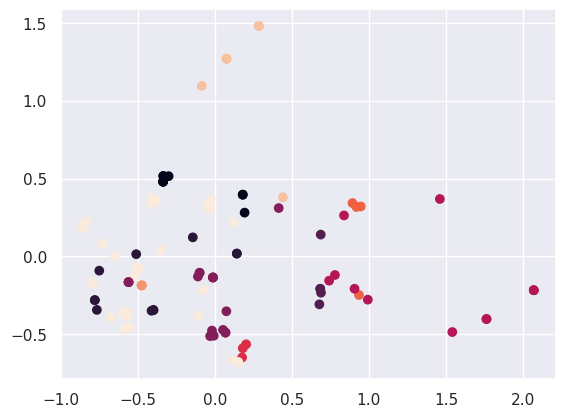

In [5]:
import time
import pandas as pd
import numpy as np 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
  

def view2d(data, labels):
  pca = PCA(n_components=2)
  reduced = pca.fit_transform(data)
  fig = plt.scatter(reduced[:,0], reduced[:,1], c=labels)
  return fig
  
labels = cluster.kmeans(embed_df,10)
view2d(embed_df, labels)


Sequence Embedding takes 2.034 seconds with shape of (110, 441)


/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (79). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (82). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (85). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (88). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2

Best clustering performance (1.3465135252796497e-07) is achieved when clusters number is 79
Random choice per cluster returned 110 values
   0 , 1    |    1 , 3    |    2 , 1    |    3 , 3    |    4 , 3   
   5 , 1    |    6 , 2    |    7 , 3    |    8 , 3    |    9 , 1   
  10 , 1    |   11 , 1    |   12 , 1    |   13 , 2    |   14 , 2   
  15 , 1    |   16 , 1    |   17 , 3    |   18 , 3    |   19 , 1   
  20 , 3    |   21 , 1    |   22 , 1    |   23 , 1    |   24 , 1   
  25 , 1    |   26 , 1    |   27 , 2    |   28 , 2    |   29 , 3   
  30 , 2    |   31 , 2    |   32 , 1    |   33 , 1    |   34 , 1   
  35 , 2    |   36 , 1    |   37 , 1    |   38 , 1    |   39 , 1   
  40 , 1    |   41 , 1    |   42 , 1    |   43 , 1    |   44 , 1   
  45 , 1    |   46 , 1    |   47 , 1    |   48 , 1    |   49 , 1   
  50 , 1    |   51 , 1    |   52 , 1    |   53 , 2    |   54 , 1   
  55 , 1    |   56 , 1    |   57 , 1    |   58 , 1    |   59 , 2   
  60 , 1    |   61 , 1    |   62 , 2    |   63

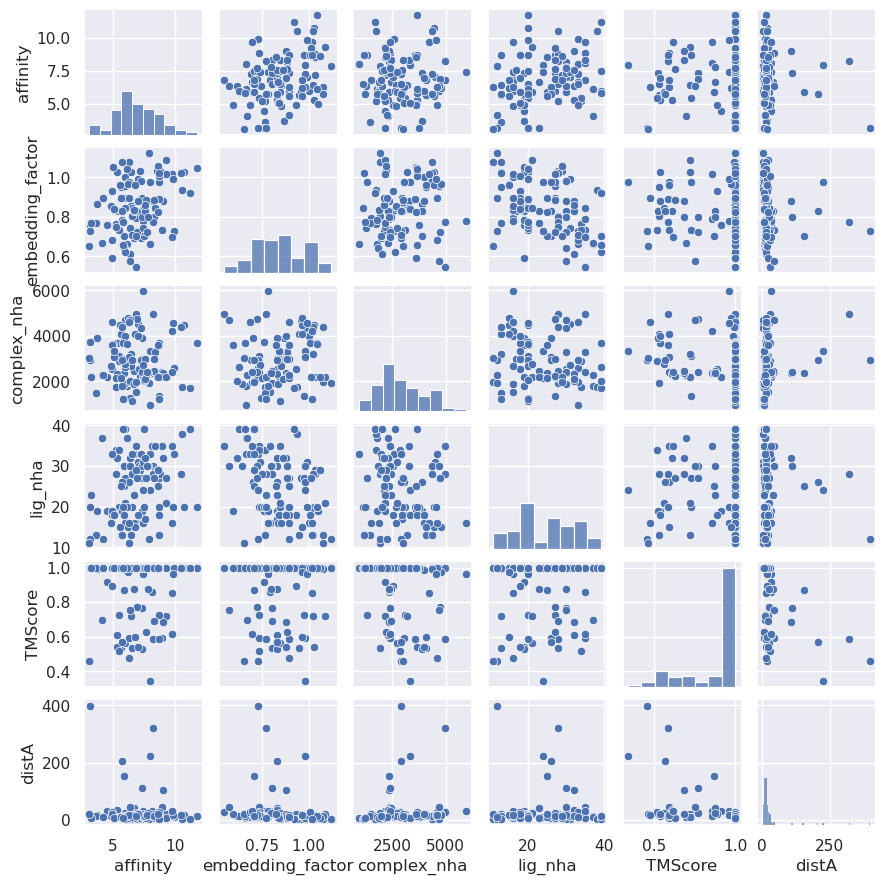

In [2]:
import pandas as pd
import numpy as np 
from BetaPose import cluster
import seaborn as sns; sns.set()

title_csv = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/INDEX_ABS_SEL_TITSEQ.csv"; 
title_csv = "/home/yzhang/Documents/Personal_documents/BetaPose/test110.csv"
thetable = pd.read_csv(title_csv, index_col=0); 

embed_df = cluster.SequenceEmbed(thetable.seq); 

func = cluster.agglomerative; 
iterations = range(10,90,3); 
clusternr = cluster.OptimalCluster(embed_df, func, iterations, method="db")

clusters = func(embed_df, clusternr)
choice = cluster.RandomPerCluster(clusters, 3)

counts = np.unique(clusters, return_counts=True)
c = 1
for i,j in zip(*counts): 
  if (c) % 5 == 0: 
    print(f"{i:>4} , {j:<4}")
  else: 
    print(f"{i:>4} , {j:<4} | ", end="")
  c += 1

theslice = thetable[["affinity", "embedding_factor", "complex_nha", "lig_nha", "TMScore", "distA"]]
sns.pairplot(theslice, size=1.5);

# Evaluate the clustering 

In [3]:
from sklearn import metrics

# cluster.Agglomerative
func = cluster.Agglomerative
cluster.OptimalCluster(embed_df, func, range(10,90,3), method="db")


Best clustering performance (1.335969521170237e-07) is achieved when clusters number is 79


79

In [12]:
import numpy as np 

rows = thetable.loc[choice]; 
rows=rows.reset_index(); 
rows = rows.set_index("index"); 

status = (rows.lig_nha > 10) * (rows.lig_nha < 40) * (rows.complex_nha < 6035); 
print(f"Entries kept {np.count_nonzero(status)} after filtration"); 

rows = rows.loc[status]; 
rows = rows.reset_index(); 
rows = rows.set_index("index"); 
print(f"Total set: {len(rows.PDB)} , After unique: {len(set(rows.PDB))}")
rows


Entries kept 110 after filtration
Total: 110 , After 110


,PDB,resolution,year,affinity,kd/ki,embedding_factor,complex_nha,lig_nha,title,seq
index,,,,,,,,,,
8,1gi7,1.79,2002,4.51,Ki=31uM,0.760032,2187,19,A NOVEL SERINE PROTEASE INHIBITION MOTIF INVOL...,KPSSPPEELKFQCGQKTLRPRFK
19,1ydk,1.95,2005,5.89,Kd=1.3uM,0.703020,3888,26,CRYSTAL STRUCTURE OF THE I219A MUTANT OF HUMAN...,MAEKPKLHYFNARGRMESTRWLLAAAGVEFEEKFIKSAEDLDKLRN...
32,1ppc,1.80,1994,6.16,Ki=0.69uM,0.665085,1814,37,GEOMETRY OF BINDING OF THE BENZAMIDINE-AND ARG...,IVGGYTCGANTVPYQVSLNSGYHFCGGSLINSQWVVSAAHCYKSGI...
38,2a8g,1.99,2006,3.69,Kd=205uM,0.866161,3903,19,STRUCTURE OF AVIDIN IN COMPLEX WITH THE LIGAND...,KCSLTGKWTNDLGSNMTIGAVNSRGEFTGTYTTAVTATSNEIKESP...
45,7std,1.80,1999,10.72,Ki=19pM,1.025595,4453,20,SCYTALONE DEHYDRATASE PLUS INHIBITOR 4,GEITFSDYLGLMTCVYEWADSYDSKDWDRLRKVIAPTLRIDYRSFL...
...,...,...,...,...,...,...,...,...,...,...
638,1bgq,2.50,1999,8.57,Kd=2.7nM,0.823261,3607,25,RADICICOL BOUND TO THE ATP BINDING SITE OF THE...,MRGSHHHHHHGMASETFEFQAEITQLMSLIINTVYSNKEIFLRELI...
649,2vh6,1.95,2008,9.70,Ki=0.2nM,0.696058,2433,35,STRUCTURE AND PROPERTY BASED DESIGN OF FACTOR ...,IVGGQECKDGECPWQALLINEENEGFCGGTILSEFYILTAAHCLYQ...
656,1c5y,1.65,2000,4.20,Ki=63uM,0.892707,2275,12,STRUCTURAL BASIS FOR SELECTIVITY OF A SMALL MO...,KPSSPPEELKFQCGQKTLRPRFK


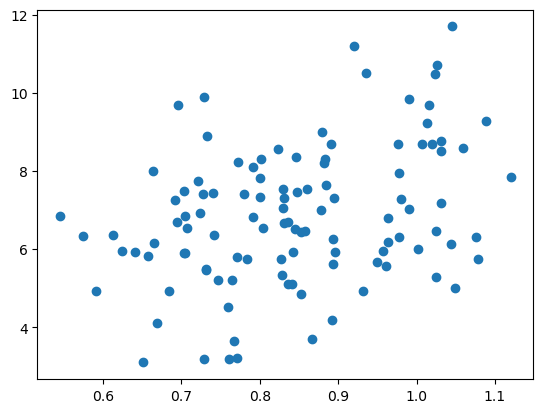

In [14]:
import matplotlib.pyplot as plt
plt.scatter(rows.embedding_factor, rows.affinity)
with open("/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/test110.csv", "w") as file1: 
  file1.write(rows.to_csv())
